Lab 8

Huynh Vo Ngoc Thanh - 21520449

In [3]:
import cv2
import matplotlib.pyplot as plt

In [5]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier( 'haarcascade_eye.xml')
nose_cascade = cv2.CascadeClassifier('haarcascade_mcs_nose.xml')
mouth_cascade = cv2.CascadeClassifier('haarcascade_mcs_mouth.xml')

fullbody_cascade = cv2.CascadeClassifier('haarcascade_fullbody.xml')
lowerbody_cascade = cv2.CascadeClassifier('haarcascade_lowerbody.xml')
upperbody_cascade = cv2.CascadeClassifier('haarcascade_upperbody.xml')

car_cascade = cv2.CascadeClassifier('haarcascade_car.xml')

1. Detect eyes, nose, mouth in face:

In [6]:
def face_features(path_img):
    # Read the input image
    img = cv2.imread(path_img)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, 1.01, 6)

    # For each face detected, detect eyes, nose, and mouth
    for (x, y, w, h) in faces:
        # Draw a rectangle around the face
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
        # Get the region of interest (ROI) for the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
            
        # Detect eyes in the face ROI
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.05, 6)
        for (ex, ey, ew, eh) in eyes:
            # Draw a rectangle around each eye
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
            
        # Detect nose in the face ROI
        nose = nose_cascade.detectMultiScale(roi_gray, 1.35, 8)
        for (nx, ny, nw, nh) in nose:
            # Draw a rectangle around the nose
            cv2.rectangle(roi_color, (nx, ny), (nx+nw, ny+nh), (0, 255, 255), 2)
            
        # Detect mouth in the face ROI
        mouth = mouth_cascade.detectMultiScale(roi_gray, 1.32, 8)
        for (mx, my, mw, mh) in mouth:
            # Draw a rectangle around the mouth
            cv2.rectangle(roi_color, (mx, my), (mx+mw, my+mh), (0, 0, 255), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis
    plt.show()

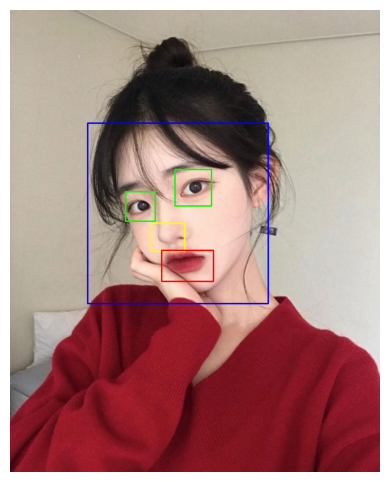

In [7]:
face_features(r'images/face_1.jpg')

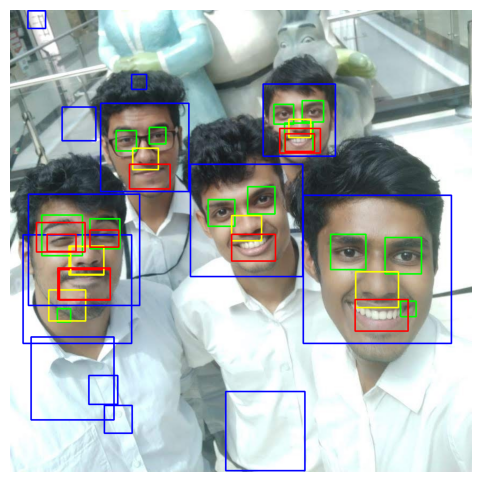

In [8]:
face_features(r'images/face_2.jpg')

2_1. Detect pedestrian in image:

In [9]:
def fullbody_detect(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    fullbody = fullbody_cascade.detectMultiScale(gray, 1.01, 4)

    # Vẽ hình chữ nhật quanh các đối tượng được phát hiện
    for (x, y, w, h) in fullbody:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [10]:
def upper_detect(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    upperbody = upperbody_cascade.detectMultiScale(gray, 1.02, 6)

    for (xu, yu, wu, hu) in upperbody:
        cv2.rectangle(img, (xu, yu), (xu+wu, yu+hu), (0, 255, 0), 2)

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [11]:
def lower_detect(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    lowerbody = lowerbody_cascade.detectMultiScale(gray, 1.01, 6)

    for (xl, yl, wl, hl) in lowerbody:
        cv2.rectangle(img, (xl, yl), (xl+wl, yl+hl), (0, 0, 255), 2)

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

Full body

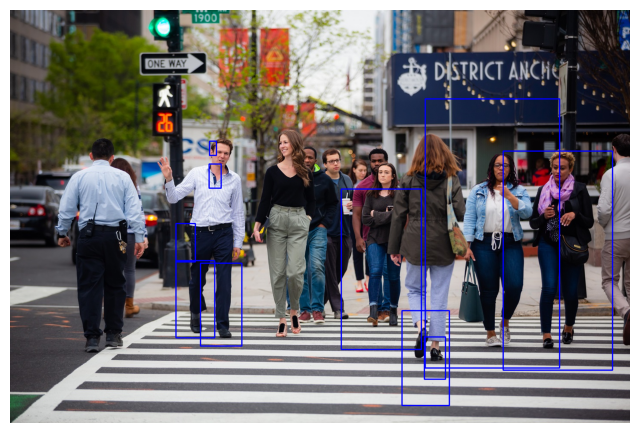

In [12]:
fullbody_detect(r'images/pedestrian.jpg')

Upper body

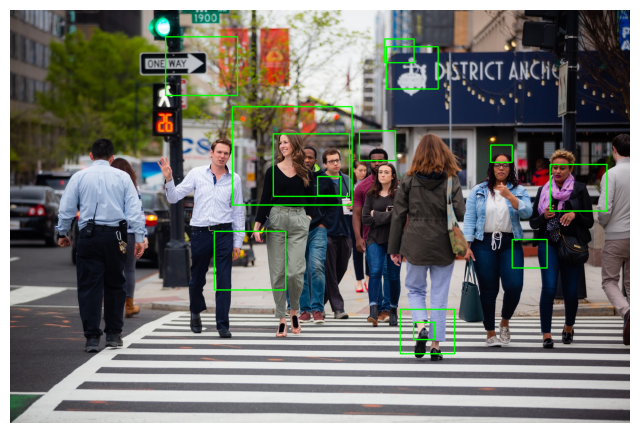

In [13]:
upper_detect(r'images/pedestrian.jpg')

Lower body

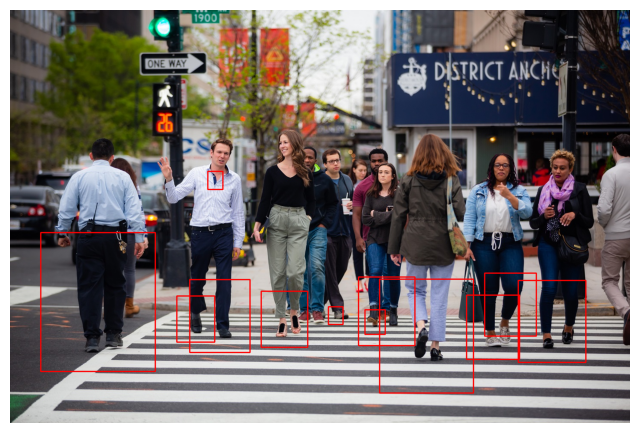

In [14]:
lower_detect(r'images/pedestrian.jpg')

2_2. Detect pedestrian in video:

Full body

In [15]:
def fullbody_video(path_video):

    # To capture video from webcam. 
    # cap = cv2.VideoCapture(0)
    # To use a video file as input 
    cap = cv2.VideoCapture(path_video)

    while True:
        # Read the frame
        _, img = cap.read()

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        fullbody = fullbody_cascade.detectMultiScale(gray, scaleFactor=1.01, minNeighbors=4, minSize=(30, 30))

        for (x, y, w, h) in fullbody:
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            
        cv2.imshow('fullbody_demo', img)

        # Stop if escape key is pressed
        k = cv2.waitKey(30) & 0xff
        if k==27:
            break
            
    # Release the VideoCapture object
    cap.release()

Upper body

In [16]:
def upper_video(path_video):

    # To capture video from webcam. 
    # cap = cv2.VideoCapture(0)
    # To use a video file as input 
    cap = cv2.VideoCapture(path_video)

    while True:
        # Read the frame
        _, img = cap.read()

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        upperbody = upperbody_cascade.detectMultiScale(gray, scaleFactor=1.01, minNeighbors=6, minSize=(30, 30))

        for (xu, yu, wu, hu) in upperbody:
            cv2.rectangle(img, (xu, yu), (xu+wu, yu+hu), (0, 255, 0), 2)

        # Display
        cv2.imshow('upper_demo', img)

        # Stop if escape key is pressed
        k = cv2.waitKey(30) & 0xff
        if k==27:
            break
            
    # Release the VideoCapture object
    cap.release()

Lower body

In [17]:
def lower_video(path_video):

    # To capture video from webcam. 
    # cap = cv2.VideoCapture(0)
    # To use a video file as input 
    cap = cv2.VideoCapture(path_video)

    while True:
        # Read the frame
        _, img = cap.read()

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


        lowerbody = lowerbody_cascade.detectMultiScale(gray, scaleFactor=1.01, minNeighbors=6, minSize=(30, 30))


        for (xl, yl, wl, hl) in lowerbody:
            cv2.rectangle(img, (xl, yl), (xl+wl, yl+hl), (0, 0, 255), 2)

        # Display
        cv2.imshow('lower_demo', img)

        # Stop if escape key is pressed
        k = cv2.waitKey(30) & 0xff
        if k==27:
            break
            
    # Release the VideoCapture object
    cap.release()

In [274]:
fullbody_video(r'videos/pedestrian.mp4')

In [275]:
upper_video(r'videos/pedestrian.mp4')

In [18]:
lower_video(r'videos/pedestrian.mp4')

3. Detect car in image:

In [19]:
def car_detect(path_img):
    img = cv2.imread(path_img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    car = car_cascade.detectMultiScale(gray, 1.01, 4)

    # Vẽ hình chữ nhật quanh các đối tượng được phát hiện
    for (x, y, w, h) in car:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 120, 200), 2)

    # Hiển thị ảnh kết quả
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

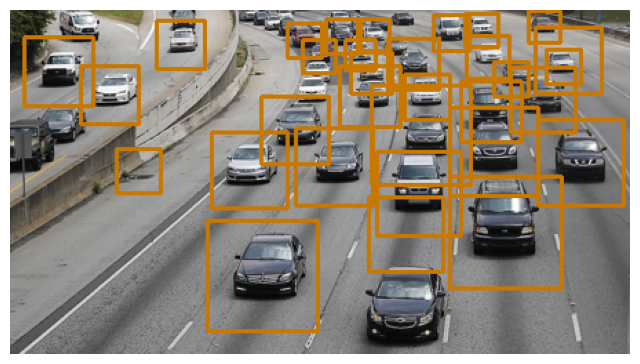

In [20]:
car_detect(r'images/car_1.jpg')

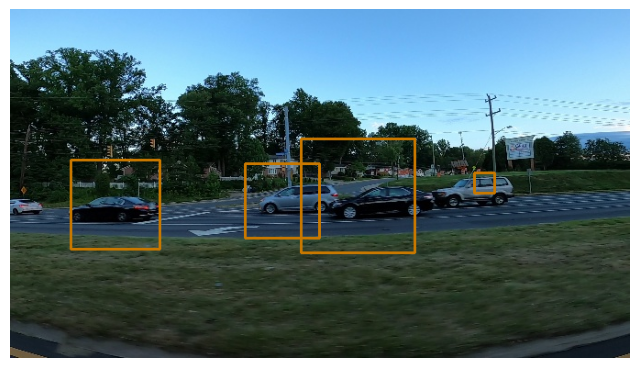

In [21]:
car_detect(r'images/car_2.jpg')